<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TRANSFER LEARNING: FINE TUNING** 

In [1]:
import tensorflow as tf
!nvidia-smi

Wed Nov  3 10:57:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###**GETTING HELPER FUNCTIONS AND DATA**

In [2]:
!wget https://raw.githubusercontent.com/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/main/helper_functions_py.py

--2021-11-03 10:57:27--  https://raw.githubusercontent.com/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/main/helper_functions_py.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5886 (5.7K) [text/plain]
Saving to: ‘helper_functions_py.py’

helper_functions_py 100%[===================>]   5.75K  --.-KB/s    in 0s      

2021-11-03 10:57:27 (60.9 MB/s) - ‘helper_functions_py.py’ saved [5886/5886]



In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-11-03 10:57:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 108.177.112.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   179MB/s    in 0.9s    

2021-11-03 10:57:28 (179 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
from helper_functions_py import unzip_data,tensor_board_callback,walk_through,plot_curves

In [5]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [6]:
walk_through("/content/10_food_classes_10_percent")

THERE ARE 2 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRE

###**CREATING BATCHES OF DATA USING - tf.keras.preprocessing.image_dataset_from_directory**

In [7]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_10_percent/train",
                                                                 image_size = (224,224),
                                                                 label_mode = "categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_10_percent/test",
                                                                 image_size = (224,224),
                                                                 label_mode = "categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###**USING KERAS FUNCTIONAL API TO BUILD OUR FIRST MODEL**

In [8]:
import tensorflow as tf

In [9]:
#no normalization needed to be aaded since efficientnet B0 already has a normalization layer
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
input_layer = tf.keras.layers.Input(shape = (224,224,3),name="INPUT_LAYER")
x = base_model(input_layer)
print(f'OUTPUT SHAPE OF THE MODEL BEFORE IS: {x.shape}')
x = tf.keras.layers.GlobalAveragePooling2D(name="GLOBAL_AVERAGE_POOLING_LAYER")(x)
print(f'OUTPUT SHAPE OF THE MODEL AFTER IS: {x.shape}')
output_layer = tf.keras.layers.Dense(10,activation = "softmax")(x)
model0 = tf.keras.Model(input_layer,output_layer)
model0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics="accuracy")
history0 = model0.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = int(0.25*len(test_data)),
                      callbacks = [tensor_board_callback("MODEL_RECORDS","efficientnetB0")])

16719872/16705208 [==============================] - 0s 0us/step
OUTPUT SHAPE OF THE MODEL BEFORE IS: (None, 7, 7, 1280)
OUTPUT SHAPE OF THE MODEL AFTER IS: (None, 1280)


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
24/24 [==============================] - 47s 470ms/step - loss: 1.8719 - accuracy: 0.4253 - val_loss: 1.3136 - val_accuracy: 0.7204
Epoch 2/5
24/24 [==============================] - 7s 265ms/step - loss: 1.1205 - accuracy: 0.7653 - val_loss: 0.8985 - val_accuracy: 0.8191
Epoch 3/5
24/24 [==============================] - 9s 353ms/step - loss: 0.8267 - accuracy: 0.8080 - val_loss: 0.6894 - val_accuracy: 0.8470
Epoch 4/5
24/24 [==============================] - 9s 356ms/step - loss: 0.6821 - accuracy: 0.8453 - val_loss: 0.6099 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 7s 260ms/step - loss: 0.5784 - accuracy: 0.8707 - val_loss: 0.5745 - val_accuracy: 0.8438


###**EVALUATING MODEL0**

In [10]:
model0.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 0.6060 - accuracy: 0.8388


[0.6060203313827515, 0.8388000130653381]

In [11]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [12]:
model0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT_LAYER (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GLOBAL_AVERAGE_POOLING_LAYER (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


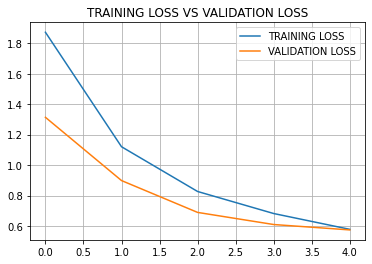

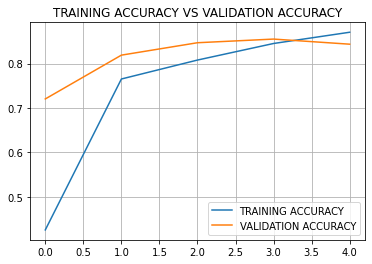

In [13]:
plot_curves(history0)

###**RUNNING A SERIES OF TRANSFER LEARNING EXPERIMENTS:**
* model1 - use feature extraction transfer learning with 1% of the data and with data augumentation
* model2 - use feature extraction transfer learning with 10% of the data and with data augumentation
* model3 - use fine tuning transfer learning with 10% of the data and with data augumentation
* model4 - use fine tuning transfer learning with 100% of the data and with data augumentation

###**MODEL1**
* training with a data augumentation layer only on 1% of the data with only feature extraction

In [14]:
#getting the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-11-03 10:59:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   137MB/s    in 0.9s    

2021-11-03 10:59:27 (137 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
walk_through("/content/10_food_classes_1_percent")

THERE ARE 2 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 7 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THER

In [16]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_1_percent/train",
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_1_percent/test",
                                                                label_mode = "categorical",
                                                                image_size = (224,224))

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###**MAKING DATA AUGUMENTATION LAYER**
* when we make a data augumentation layer in the model, our data gets preprocessed while training itself.
* the major advantage of this is that the data augumentation layer can make use of the GPU to preprocess data
* the preprocessing layer is frozen and is not used while testing or evaluating

In [17]:
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing

In [18]:
data_augumentation_layer = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2)
  #preprocessing.Rescale(1/255.) -for nets like resnetV250, but we din't need it for layers like efficientnetB0 as it has
  # a built in rescaling layer
],name = "data_augumentation")

In [19]:
import helper_functions_py 
from importlib import reload
reload(helper_functions_py)
from helper_functions_py import random_augumented_img_plotter 

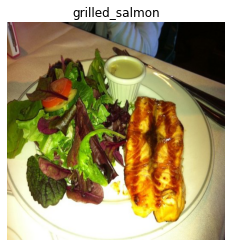

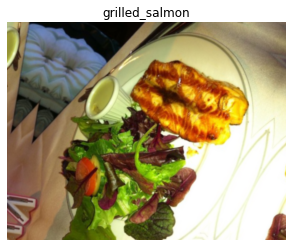

In [20]:
random_augumented_img_plotter("/content/10_food_classes_1_percent/train",train_data.class_names,data_augumentation_layer)

In [21]:
#model1
base_layer = tf.keras.applications.EfficientNetB0(include_top = False)
base_layer.trainable = False
inputs = tf.keras.Input(shape=(224,224,3),name="input_layer")
x = data_augumentation_layer(inputs)
x = base_layer(x)
x = tf.keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model1 = tf.keras.Model(inputs,outputs)
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = "accuracy")
history1 = model1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = int(0.25*len(test_data)),
                      callbacks = [tensor_board_callback("testing4models","model1")])

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 17s 4s/step - loss: 2.3380 - accuracy: 0.0857 - val_loss: 2.2436 - val_accuracy: 0.1579
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1135 - accuracy: 0.2429 - val_loss: 2.1414 - val_accuracy: 0.2138
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9759 - accuracy: 0.3714 - val_loss: 2.0293 - val_accuracy: 0.2928
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8100 - accuracy: 0.4429 - val_loss: 1.9502 - val_accuracy: 0.3257
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6947 - accuracy: 0.5143 - val_loss: 1.8506 - val_accuracy: 0.4095


In [22]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augumentation (Sequenti (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
model1_eval = model1.evaluate(test_data)
model1_eval

79/79 [==============================] - 11s 130ms/step - loss: 1.8665 - accuracy: 0.3780


[1.866524577140808, 0.3779999911785126]

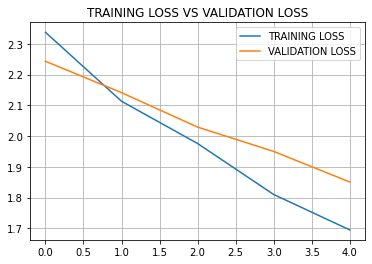

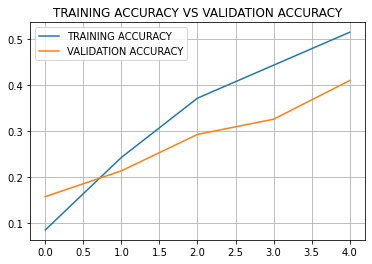

In [24]:
plot_curves(history1)

###**MODEL2**
* training with a data augumentation layer only on 10% of the data with only feature extraction

In [25]:
walk_through("/content/10_food_classes_10_percent")

THERE ARE 2 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 75 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRE

In [26]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_10_percent/train",
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_10_percent/test",
                                                                label_mode= "categorical",
                                                                image_size = (224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
data_augumentation_layer = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomRotation(0.2)
])

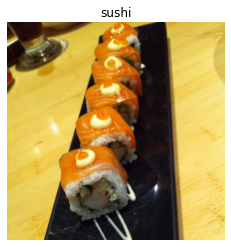

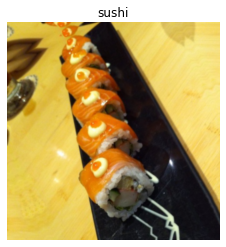

In [28]:
random_augumented_img_plotter("/content/10_food_classes_10_percent/train",train_data.class_names,data_augumentation_layer)

In [29]:
#model2
base_layer = tf.keras.applications.EfficientNetB0(include_top=False)
base_layer.trainable = False
inputs = tf.keras.Input(shape = (224,224,3))
x = data_augumentation_layer(inputs)
x = base_layer(x,training = False)#training = False ensures that our model gets trained in the inference mode, i.e, the 
#batch normalization layers are not changed during fine tuning
x = tf.keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
model2 = tf.keras.Model(inputs,outputs)
model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = "accuracy")
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


###**CREATING A MODEL CHECKPOINT**

In [30]:
def create_model_checkpoint(ckpfile):
  return tf.keras.callbacks.ModelCheckpoint(filepath = ckpfile,
                                            save_weights_only = True,
                                            save_best_only = False,
                                            save_freq = 'epoch',
                                            verbose = 1)

In [31]:
initial_epochs = 5#for fine tuning we need this
history2 = model2.fit(train_data,
                      epochs = initial_epochs,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps =int(0.25*len(test_data)),
                      callbacks = [tensor_board_callback("testing4models","model2"),create_model_checkpoint("model2.ckpt")])

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
24/24 [==============================] - 27s 827ms/step - loss: 2.0476 - accuracy: 0.3040 - val_loss: 1.5180 - val_accuracy: 0.6069

Epoch 00001: saving model to model2.ckpt
Epoch 2/5
24/24 [==============================] - 18s 744ms/step - loss: 1.3950 - accuracy: 0.6413 - val_loss: 1.0839 - val_accuracy: 0.7270

Epoch 00002: saving model to model2.ckpt
Epoch 3/5
24/24 [==============================] - 14s 571ms/step - loss: 1.1024 - accuracy: 0.7373 - val_loss: 0.8883 - val_accuracy: 0.7780

Epoch 00003: saving model to model2.ckpt
Epoch 4/5
24/24 [==============================] - 16s 632ms/step - loss: 0.9452 - accuracy: 0.7560 - val_loss: 0.7982 - val_accuracy: 0.7895

Epoch 00004: saving model to model2.ckpt
Epoch 5/5
24/24 [==============================] - 15s 627ms/step - loss: 0.8320 - accuracy: 0.8067 - val_loss: 0.7100 - val_accuracy: 0.8141

Epoch 00005: saving model to model2.ckpt


In [32]:
model2_eval = model2.evaluate(test_data)
model2_eval

79/79 [==============================] - 11s 129ms/step - loss: 0.7265 - accuracy: 0.7972


[0.7265449166297913, 0.7972000241279602]

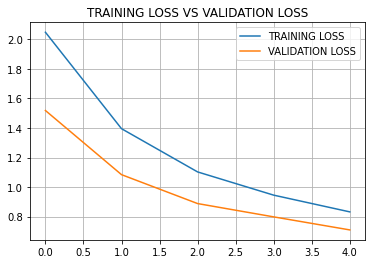

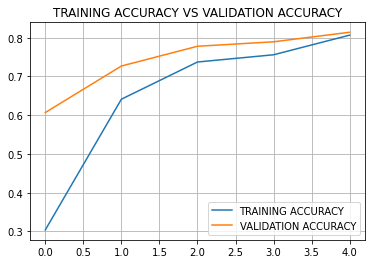

In [33]:
plot_curves(history2)

###**LOADING WEIGHTS TO OUR MODEL2 USING THE MODEL CHECKPOINT CALLBACK**

In [34]:
model2.load_weights("model2.ckpt")

In [35]:
model2_eval_afterckptload = model2.evaluate(test_data)

79/79 [==============================] - 11s 129ms/step - loss: 0.7265 - accuracy: 0.7972


In [36]:
model2_eval_afterckptload

[0.726544976234436, 0.7972000241279602]

In [37]:
model2_eval

[0.7265449166297913, 0.7972000241279602]

In [38]:
model2_eval_afterckptload == model2_eval

False

###**MODEL3**
* fine tuning our model and training it on augumented 10% of the data

###**TIPS ON FINE TUNING**
* FINE TUNING WORKS THE BEST AFTER USING TRANSFER LEARNING TO TRAIN A FEATURE EXTRACTION MODEL AND WHEN WE TRAIN THE MODEL ON A LARGE AMOUNT OF CUSTOM DATA 
* USUALLY, WE ONLY FINE TUNE THE LAST FEW LAYERS OF A MODEL AS THESE ARE THE LAYERS THAT LEARN THE SMALL INTRICATE DETAILS IN THE DATA
* WE USE A SMALLER LEARNING RATE(USUALLY 10X SMALLER) TO FINE TUNE THE MODEL, ALTHOUGH THE LEARNING RATE STILL REMAINS A HYPERPARAMERTER THAT CAN BE TUNED

In [39]:
model3 = model2

In [40]:
model3.layers

In [41]:
#lets unfreeze the top 10(last 10 in code) layers of the model
#lets view all the layers
for layer_number,layer in enumerate(model3.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [65]:
#we can see above that all the layers are not trainable
#lets unfreeze the top 10 layers
base_layer.trainable = True
for layer in base_layer.layers[:-10]:
  layer.trainable = False

In [66]:
model3.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
               metrics = "accuracy")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [67]:
for layer_number,layer in enumerate(model3.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [45]:
total_epochs = initial_epochs + 5
history3 = model3.fit(train_data,
                      epochs = total_epochs,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = int(0.25*len(test_data)),
                      initial_epoch = history2.epoch[-1],
                      callbacks = [tensor_board_callback("testing4models","model3")])

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
24/24 [==============================] - 13s 515ms/step - loss: 0.7518 - accuracy: 0.7920 - val_loss: 0.6696 - val_accuracy: 0.8207
Epoch 7/10
24/24 [==============================] - 12s 490ms/step - loss: 0.7599 - accuracy: 0.8107 - val_loss: 0.6623 - val_accuracy: 0.8257
Epoch 8/10
24/24 [==============================] - 12s 496ms/step - loss: 0.7444 - accuracy: 0.8133 - val_loss: 0.6959 - val_accuracy: 0.8043
Epoch 9/10
24/24 [==============================] - 13s 517ms/step - loss: 0.7463 - accuracy: 0.8080 - val_loss: 0.6767 - val_accuracy: 0.8158
Epoch 10/10
24/24 [==============================] - 15s 613ms/step - loss: 0.7232 - accuracy: 0.8173 - val_loss: 0.6977 - val_accuracy: 0.8125


In [46]:
model3_eval = model3.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.6869 - accuracy: 0.8040


In [47]:
print(f'MODEL1 EVALUATION: {model1_eval}')
print(f'MODEL2 EVALUATION: {model2_eval}')
print(f'MODEL3 EVALUATION: {model3_eval}')

MODEL1 EVALUATION: [1.866524577140808, 0.3779999911785126]
MODEL2 EVALUATION: [0.7265449166297913, 0.7972000241279602]
MODEL3 EVALUATION: [0.6868511438369751, 0.8040000200271606]


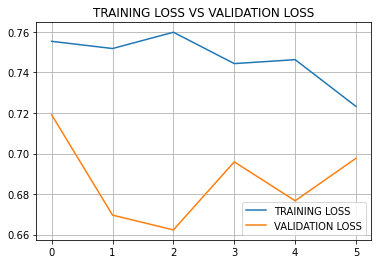

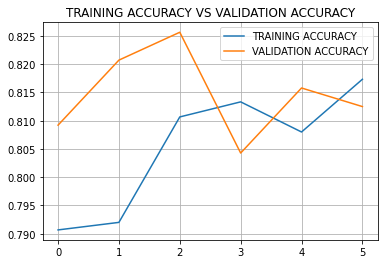

In [48]:
plot_curves(history3)

In [49]:
#THE ABOVE GRAPHS ARE ONLY SHOWING THE LOSS AND ACCURACY CURVES AFTER THE INITIAL 5 EPOCHS, SO LETS BUILD A BETTER FUNCTION
def compare_history(historyo,historyl,initial_epochs = 5):
  '''
  Args: historyo-original history(eg: before fine tuning)
        history1-later history(eg: after fine tuning)
  function: plots the curves to compare histories
  returns: none
  '''
  import matplotlib.pyplot as plt
  #loss data
  original_training_loss = historyo.history["loss"]
  original_validation_loss = historyo.history["val_loss"]
  latest_training_loss = historyo.history["loss"] + historyl.history["loss"]
  latest_validation_loss = historyo.history["val_loss"] + historyl.history["val_loss"]
  #accuracy data
  original_training_acc = historyo.history["accuracy"]
  original_validation_acc = historyo.history["val_accuracy"]
  latest_training_acc = historyo.history["accuracy"] + historyl.history["accuracy"]
  latest_validation_acc = historyo.history["val_accuracy"] + historyl.history["val_accuracy"]
  #plotting
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.grid(True)
  plt.plot(latest_training_loss,label = "TRAINING LOSS")
  plt.plot(latest_validation_loss,label = "VALIDATION LOSS")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label = "BEGGINGING OF FINE TUNING")
  plt.title("TRAINING LOSS VS VALIDATION LOSS ")
  plt.legend(loc = "upper right")
  plt.subplot(2,1,2)
  plt.grid(True)
  plt.plot(latest_training_acc,label = "TRAINING ACCURACY")
  plt.plot(latest_validation_acc,label = "VALIDATION ACCURACY")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label = "BEGGINGING OF FINE TUNING")
  plt.title("TRAINING ACCURACY VS VALIDATION ACCURACY ")
  plt.legend(loc = "lower right")

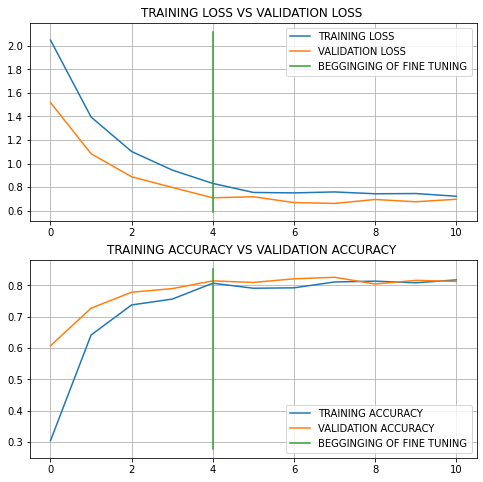

In [50]:
compare_history(history2,history3)

###**MODEL4**
* TRAINING ON 100% OF THE DATA WITH FINE TUNING

In [69]:
#loading the feature extraction model
model4 = model3
model4.load_weights("model2.ckpt")

In [70]:
model4.evaluate(test_data),model2_eval

79/79 [==============================] - 13s 128ms/step - loss: 0.7265 - accuracy: 0.7972


([0.7265448570251465, 0.7972000241279602],
 [0.7265449166297913, 0.7972000241279602])

In [53]:
#gettin the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-11-03 11:04:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   184MB/s    in 2.7s    

2021-11-03 11:05:02 (184 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [54]:
unzip_data("/content/10_food_classes_all_data.zip")

In [55]:
walk_through("/content/10_food_classes_all_data")

THERE ARE 2 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 750 FILES IN THIS DIRECTORY
THERE ARE 10 SUB DIRECTORIES AND 0 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN THIS DIRECTORY
THERE ARE 0 SUB DIRECTORIES AND 250 FILES IN

In [56]:
import tensorflow as tf

In [57]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_all_data/train",
                                                                         label_mode = "categorical",
                                                                         image_size = (224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory("/content/10_food_classes_all_data/test",
                                                                         label_mode = "categorical",
                                                                         image_size = (224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


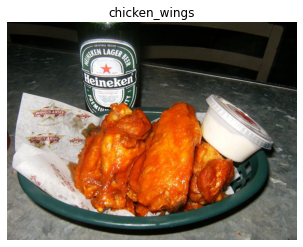

In [59]:
from helper_functions_py import random_img_plotter
random_img_plotter("/content/10_food_classes_all_data/train",train_data.class_names)

In [71]:
for index,layer in enumerate(model4.layers):
  print(index, layer.name, layer.trainable)

0 input_4 True
1 sequential True
2 efficientnetb0 True
3 pooling_layer True
4 dense_1 True


In [72]:
for index,layer in enumerate(model4.layers[2].layers):
  print(index, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [74]:
model4.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics = "accuracy")

In [75]:
history4 = model4.fit(train_data,
                      steps_per_epoch = len(train_data),
                      epochs = total_epochs,
                      initial_epoch = history2.epoch[-1],
                      validation_data = test_data,
                      validation_steps = int(0.25*len(test_data)),
                      callbacks = [tensor_board_callback("testing4models","model4")])

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
235/235 [==============================] - 70s 260ms/step - loss: 0.7392 - accuracy: 0.7591 - val_loss: 0.4239 - val_accuracy: 0.8553
Epoch 6/10
235/235 [==============================] - 78s 331ms/step - loss: 0.5983 - accuracy: 0.8045 - val_loss: 0.3919 - val_accuracy: 0.8536
Epoch 7/10
235/235 [==============================] - 72s 304ms/step - loss: 0.5322 - accuracy: 0.8240 - val_loss: 0.3401 - val_accuracy: 0.8766
Epoch 8/10
235/235 [==============================] - 71s 298ms/step - loss: 0.4828 - accuracy: 0.8477 - val_loss: 0.3204 - val_accuracy: 0.8849
Epoch 9/10
235/235 [==============================] - 67s 283ms/step - loss: 0.4488 - accuracy: 0.8547 - val_loss: 0.2932 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 62s 263ms/step - loss: 0.4247 - accuracy: 0.8612 - val_loss: 0.3011 - val_accuracy: 0.8947


In [77]:
model4_eval = model4.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.3197 - accuracy: 0.8972


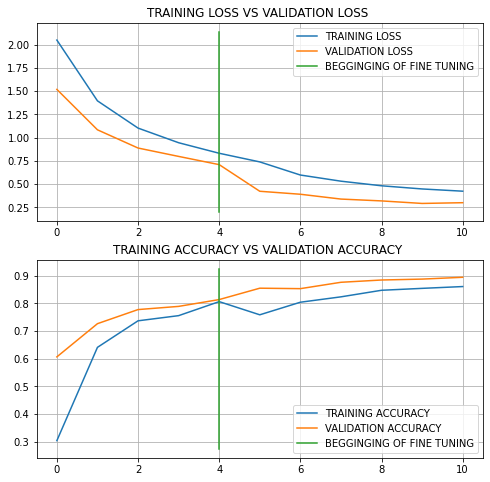

In [78]:
compare_history(history2,history4)

###**USING TENSORBOARD TO COMPARE OUR EXPERIMENTS**

In [86]:
!tensorboard dev upload --logdir ./testing4models/ \
--name "comparing the performance of 4 models" \
--description "fine tuning, without fine tuning and both with data augumentation" \
--one_shot

2021-11-03 12:00:39.714313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:00:39.723438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:00:39.724086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./testing4models/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privac

###**OUR TENSORBOARD EXPERIMENT: https://tensorboard.dev/experiment/QN9c5BvVQ6G36E9uYvy3Mw/**

In [87]:
!tensorboard dev list

2021-11-03 12:08:44.622642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:08:44.631425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:08:44.632071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/QN9c5BvVQ6G36E9uYvy3Mw/
	Name                 comparing the performance of 4 models
	Description          fine tuning, without fine tuning and both with data augumentation
	Id                   QN9c5BvVQ6G36E9uYvy3Mw
	Created              2021-11-03 12:01:31 (7 minutes ago)
	Updated              2021-11-